# 1 最简单的逻辑回归
- 目的：建立一个逻辑回归模型来预测一个学生是否被大学录取。
- 背景：假设您是一个大学部门的管理员，您希望根据每个申请人的两次考试成绩来确定他们的入学机会。您有来自以前申请人的历史数据，可以将其用作逻辑回归的训练集。

In [2]:
#本文是逻辑回归算法实现
import numpy as np
import matplotlib.pyplot as plt

#load data from file导入txt数据
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in range(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)


data = load_data('ex2data1.txt')
print(data.shape)


X = data[:,:-1]
y = data[:,-1:]
print(X.shape)
print(y.shape)

(100, 3)
(100, 2)
(100, 1)


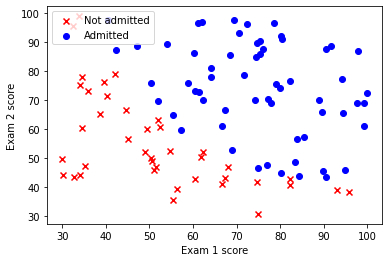

In [3]:
#可视化一下数据集
import matplotlib.pyplot as plt
label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r',label = 'Not admitted')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'b',label = 'Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper left')
plt.show()

假设函数：
$$ h_\theta = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2) $$

损失函数：
$$J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$$


In [10]:
num_train = X.shape[0]
one = np.ones((num_train, 1))  #用于构造 y = w0 + w1*x 中w0项的生成。
X = np.hstack((one, data[:,:-1])) #在水平方向拼接

W = np.zeros((3,1)) #w0 ,w1，初始化均为0.


# 定义logistic函数(sigmoid函数)
def sigmoid(z):
    return 1/(1 + np.exp(-z))


"""定义损失函数计算公式"""
def compute_cost(X_test, y_test, theta):
    h = sigmoid(X_test.dot(theta))
    cost = (-y_test.T.dot(np.log(h)) - (1-y_test.T).dot(np.log(1-h))) / len(X_test)
    return cost


cost_1 = compute_cost(X, y, W)
print("三个θ参数初始化为0, 0, 0时，代价函数的值为：", cost_1)
cost_2 = compute_cost(X, y, np.array([[-1],[0.1],[0.2]]))
print("三个θ参数初始化为-1, 0.1, 0.2时，代价函数的值为：", cost_2)



三个θ参数初始化为0, 0, 0时，代价函数的值为： [[0.69314718]]
三个θ参数初始化为-1, 0.1, 0.2时，代价函数的值为： [[0.79830575]]


# 批量梯度下降

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)   $$

损失函数的求导过程：

<img src="./1.png" width=550px>

In [77]:
"""梯度下降算法的实现"""
def gradient_descent(X_test, y_test, theta, alpha=0.01, iters = 1500):
    J_history = []
    theta_history = []
    num_X = X_test.shape[0]

    for i in range(iters):
        
        theta_history.append(theta)

        h = sigmoid(X_test.dot(theta))
        theta = theta - alpha * X_test.T.dot(h - y_test) / num_X #点乘已经包括求和操作了。
        cost = compute_cost(X_test, y_test, theta)
        J_history.append(cost[0])
        

    return theta, J_history, theta_history


theta, J_history, theta_history = gradient_descent(X, y, np.array([[0],[0],[0]]))
print(theta)
print(np.array(J_history).shape)


[[-1.14871686]
 [ 0.56980921]
 [ 0.11139426]]
(1500, 1)


C:\Users\yinm\AppData\Local\Temp/ipykernel_14928/703062008.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-y_test.T.dot(np.log(h)) - (1-y_test.T).dot(np.log(1-h))) / len(X_test)


# 可视化逻辑回归效果和代价函数值的变化曲线


[[-13.18512779]
 [  0.11067858]
 [  0.10469185]]
(600000, 1)


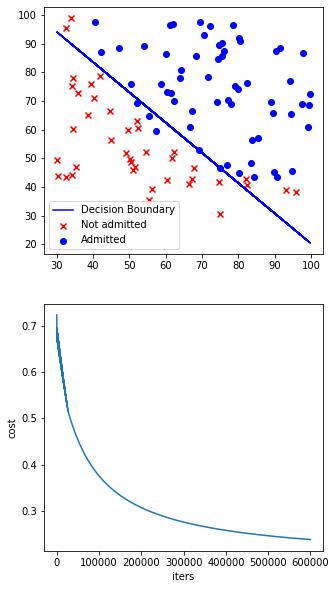

In [105]:
theta, J_history, theta_history = gradient_descent(X, y, np.array([[0],[0],[0]]), alpha=0.0011, iters = 600000)
print(theta)
print(np.array(J_history).shape)


plt.figure(figsize=(5,10))
plt.subplot(211)
label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,1],X[label0,2],marker='x',color = 'r',label = 'Not admitted')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,1],X[label1,2],marker='o',color = 'b',label = 'Admitted')

#决策曲线公式：theta0 + theta1*x1 + theta2*x2 = 0
#要换成y=mx+b形式，所以：x2 = (-1/thetheta2)(theta0 + theta1*x1)
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*X[:,1])
plt.plot(X[:,1], boundary_ys,'b-',label='Decision Boundary')
plt.legend() # 将label显示出来

#可视化一下cost变化曲线
plt.subplot(212)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')

plt.show()


# 如何应用
得到了theta参数，如何实际应用？即给定某个人第一次考试分数$x_1$和第二次考试分数$x_2$，那么他有多大概率能被录取？

求录取概率的方法:
$$ p = sigmoid(\theta_0 + \theta_1 * x_1 + \theta_2 * x_2) $$
其中：
- $\theta_0=-13.18512779$
- $\theta_0=0.11067858$
- $\theta_0=0.10469185$

# 其他实验备注

C:\Users\yinm\AppData\Local\Temp/ipykernel_14928/703062008.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-y_test.T.dot(np.log(h)) - (1-y_test.T).dot(np.log(1-h))) / len(X_test)
C:\Users\yinm\AppData\Local\Temp/ipykernel_14928/703062008.py:16: RuntimeWarning: divide by zero encountered in log
  cost = (-y_test.T.dot(np.log(h)) - (1-y_test.T).dot(np.log(1-h))) / len(X_test)


[[-0.11050392]
 [ 0.56171635]
 [ 0.10327465]]
[[-0.22066761]
 [ 1.13880436]
 [ 0.19561482]]
[[-0.10400148]
 [ 0.01114724]
 [ 0.00125993]]
[[-0.98252161]
 [ 0.01729759]
 [ 0.0081125 ]]


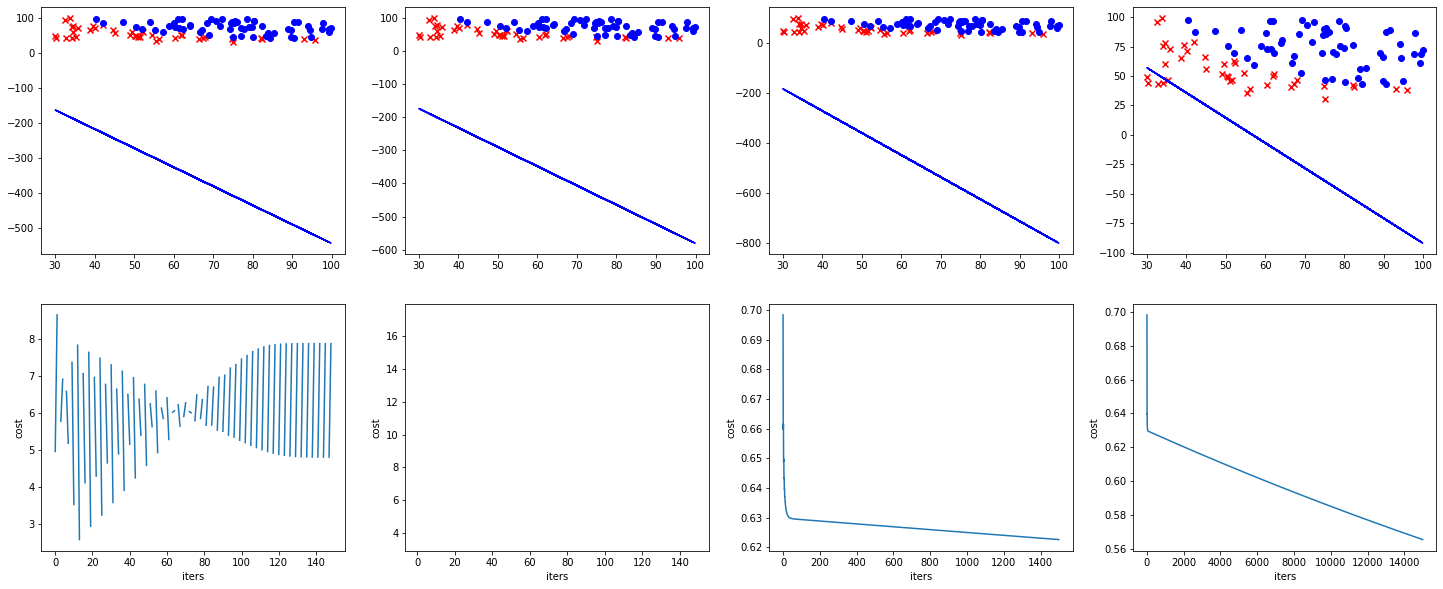

In [100]:
global plot_num
plot_num = 241

def plot_all(alpha, iters):
    global plot_num
    theta, J_history, theta_history = gradient_descent(X, y, np.array([[0],[0],[0]]), alpha, iters)
    print(theta)
    plt.subplot(plot_num)
    label0 = np.where(y.ravel() == 0)
    plt.scatter(X[label0,1],X[label0,2],marker='x',color = 'r')
    label1 = np.where(y.ravel() == 1)
    plt.scatter(X[label1,1],X[label1,2],marker='o',color = 'b')
    #决策曲线公式：theta0 + theta1*x1 + theta2*x2 = 0
    #要换成y=mx+b形式，所以：x2 = (-1/thetheta2)(theta0 + theta1*x1)
    boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*X[:,1])
    plt.plot(X[:,1], boundary_ys,'b-')
    

    #可视化一下cost变化曲线
    plt.subplot(plot_num+4)
    plt.plot(J_history)
    plt.xlabel('iters')
    plt.ylabel('cost')

    plot_num += 1


plt.figure(figsize=(25,10))
############### 1 ###############
plot_all(alpha=0.01, iters = 150)
############### 2 ###############
plot_all(alpha=0.02, iters = 150)
############### 3 ###############
plot_all(alpha=0.001, iters = 1500)
############### 4 ###############
plot_all(alpha=0.001, iters = 15000)


plt.show()

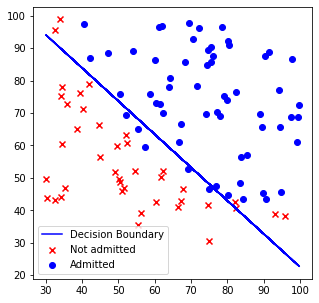

In [104]:
# 使用牛顿法(BFGS)求解的最佳参数值效果
#求解方法见：
#https://github.com/laonafahaodange/Machine-learning-course-python-code/blob/main/ex2-logistic%20regression/my_ex2.ipynb
theta = np.array([-25.16131863,   0.20623159,   0.20147149])


plt.figure(figsize=(5,5))
label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,1],X[label0,2],marker='x',color = 'r',label = 'Not admitted')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,1],X[label1,2],marker='o',color = 'b',label = 'Admitted')

#决策曲线公式：theta0 + theta1*x1 + theta2*x2 = 0
#要换成y=mx+b形式，所以：x2 = (-1/thetheta2)(theta0 + theta1*x1)
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*X[:,1])
plt.plot(X[:,1], boundary_ys,'b-',label='Decision Boundary')
plt.legend() # 将label显示出来


plt.show()

# 总结
梯度下降也能解决逻辑回归问题，但，使用梯度下降法求解此逻辑回归问题，其学习率非常敏感，而且收敛速度非常慢。

# 2 非线性的逻辑回归和正则化
- 目的：第一个案例我们学会了线性的逻辑回归边界线，对于不规则形态的边界线预测应该用什么假设公式？以及如何避免这种情况非常容易发生的过拟合？
- 例子背景：假设一款芯片生产出来后要做2种性能测试，这两种性能测试值有一定关系，你有之前该产品的性能测试值和合格与否的样本，你可以通过过去的判定标准来帮助你预测什么样的芯片才是合格的。


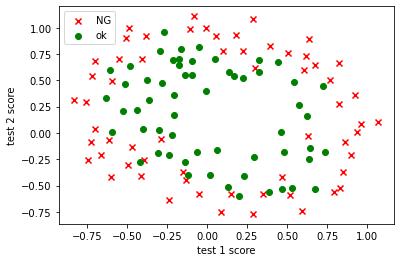

In [1]:
#本文是正则化用于逻辑回归
import numpy as np
import matplotlib.pyplot as plt

#load data from file
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in range(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)

#观察数据 
data = load_data('ex2data2.txt')

X = data[:,:-1]
y = data[:,-1:]


#可视化一下数据集合
import matplotlib.pyplot as plt
label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r',label = 'NG')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'g',label = 'ok')
plt.xlabel('test 1 score')
plt.ylabel('test 2 score')
plt.legend(loc = 'upper left')
plt.show()

# 用什么公式去划分上述两类数据？
答：用多项式作为假设函数，具体是构造1个6阶28维度的多项式，如下：

<img src="./2.jpg">



In [2]:
#定义多项式
def mapFeature(X1,X2):
    degree = 6
    out = np.ones((X1.shape[0],1))
    end = 0
    for i in np.arange(1,degree+1,1):
        for j in np.arange(0,i+1,1):
           temp = X1**(i-j) * X2**(j)
           out = np.hstack((out,temp))
    return out

X1=data[:,0:1]
X2=data[:,1:2]
X_map = mapFeature(X1, X2)
print(X_map.shape)


initial_theta = np.zeros((X_map.shape[1], 1))
test_theta = np.ones((X_map.shape[1],1)) 

# 定义logistic函数(sigmoid函数)
def sigmoid(z):
    return 1/(1 + np.exp(-z))

"""定义损失函数计算公式"""
def compute_cost(X_test, y_test, theta):
    h = sigmoid(X_test.dot(theta))
    cost = (-y_test.T.dot(np.log(h)) - (1-y_test.T).dot(np.log(1-h))) / len(X_test)
    return cost

cost_1 = compute_cost(X_map, y, initial_theta)
print("28个θ参数全初始化为0时，代价函数的值为：", cost_1)

cost_1 = compute_cost(X_map, y, test_theta)
print("28个θ参数全初始化为1时，代价函数的值为：", cost_1)

(118, 28)
28个θ参数全初始化为0时，代价函数的值为： [[0.69314718]]
28个θ参数全初始化为1时，代价函数的值为： [[2.02044154]]


# 逻辑回归训练效果的可视化

[[ 3.52676955]
 [ 2.4796755 ]
 [ 3.89314113]
 [-5.25056386]
 [-4.70796038]
 [-5.7755766 ]
 [ 1.19134302]
 [-1.6062434 ]
 [-0.70165777]
 [-0.51949185]
 [-4.44720046]
 [ 0.68214226]
 [-2.49892485]
 [-1.8484609 ]
 [-3.65930835]
 [-0.76668305]
 [-0.70009736]
 [ 0.82659284]
 [-1.61449998]
 [-1.78670449]
 [ 0.11483885]
 [-3.69833966]
 [ 0.59476872]
 [-1.06652905]
 [ 0.50968242]
 [-1.59133405]
 [-1.49711275]
 [-1.36612885]]


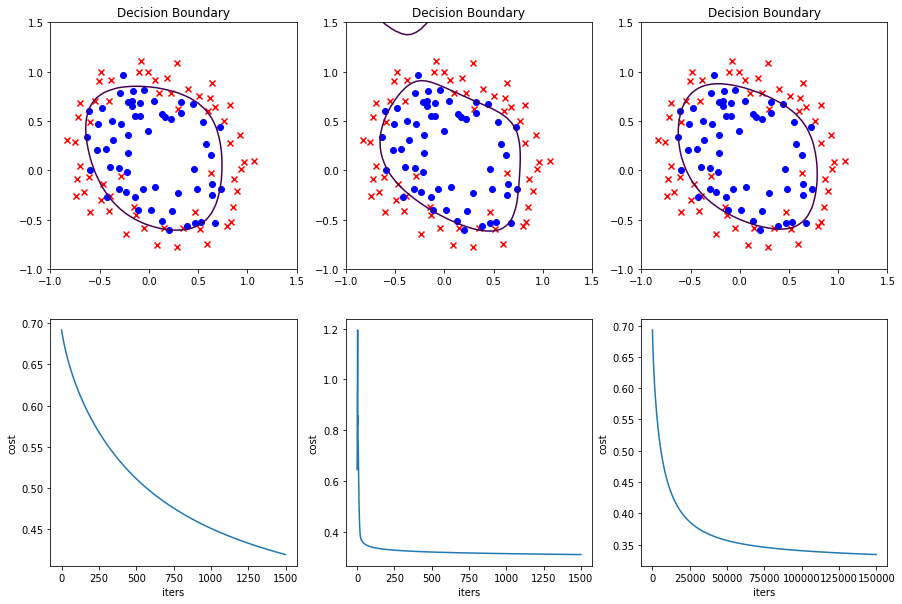

In [41]:
"""梯度下降算法的实现"""
def gradient_descent(X_test, y_test, theta, alpha=0.01, iters = 1500):
    J_history = []
    theta_history = []
    num_X = X_test.shape[0]

    for i in range(iters):
        
        theta_history.append(theta)

        h = sigmoid(X_test.dot(theta))
        theta = theta - alpha * X_test.T.dot(h - y_test) / num_X #点乘已经包括求和操作了。
        cost = compute_cost(X_test, y_test, theta)
        J_history.append(cost[0])
        
    return theta, J_history, theta_history


"""等高线作图法"""
def plotBoundary(mytheta):
    theta= mytheta
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([[xvals[i]]]), np.array([[yvals[j]]]))
            zvals[i][j] = myfeaturesij.dot(theta)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")






plt.figure(figsize=(15,10))

############ 1 ############
plt.subplot(231)
theta, J_history, theta_history = \
        gradient_descent(X_map, y, initial_theta, alpha=0.1, iters = 1500)
        
label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'b')

plotBoundary(theta)

#可视化一下cost变化曲线
plt.subplot(234)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')


############ 2 ############
plt.subplot(232)
theta, J_history, theta_history = \
        gradient_descent(X_map, y, initial_theta, alpha=10, iters = 1500)
label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'b')

plotBoundary(theta)

#可视化一下cost变化曲线
plt.subplot(235)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')


############ 3 ############
plt.subplot(233)
theta, J_history, theta_history = \
        gradient_descent(X_map, y, initial_theta, alpha=0.01, iters = 150000)
label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'b')

plotBoundary(theta)
print(theta)

#可视化一下cost变化曲线
plt.subplot(236)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')



plt.show()
